**Лабораторная работа 2**

<u>Вариант 3</u>

*Выполнила Жолнерович Арина Николаевна Б03-202в*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import math

**Задание 1**

*Переход от RGB к HSI*

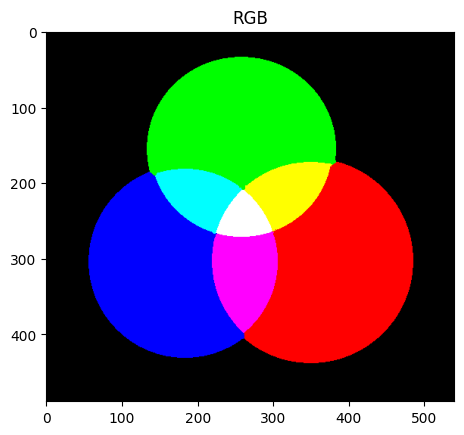

In [10]:
img_BGR=cv2.imread('Colors.png')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.title('RGB')
plt.savefig('RGB_pic.png')

In [11]:
r=np.array(img_RGB[:,:,0]).astype(np.uint64)
g=np.array(img_RGB[:,:,1]).astype(np.uint64)
b=np.array(img_RGB[:,:,2]).astype(np.uint64)
#r=r.tolist()
print('r_max=', r.max())
#g=np.array(g)
print('g_max=', g.max())
#b=np.array(b)
print('r_max=', r.max())

r_max= 255
g_max= 255
r_max= 255


In [12]:
I=((r+g+b)//3)/255

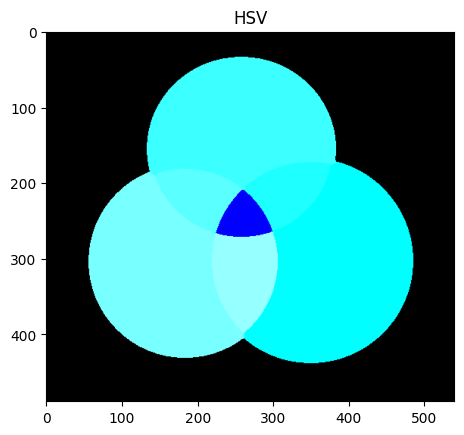

In [13]:
img_HSV=cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
plt.title('HSV')
plt.imshow(img_HSV)

In [14]:
H=np.array(img_HSV[:,:,0]).astype(np.uint64)/180
S=np.array(img_HSV[:,:,1]).astype(np.uint64)/255
V=np.array(img_HSV[:,:,2]).astype(np.uint64)/255
H.max()

np.float64(0.8333333333333334)

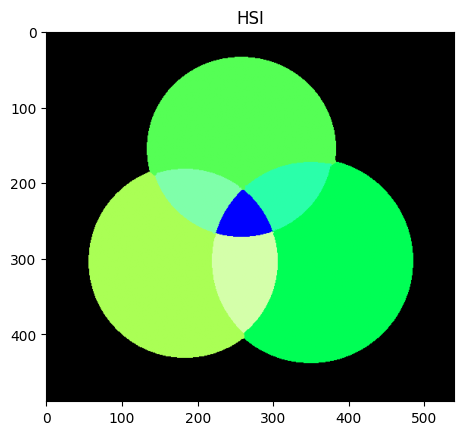

In [15]:
img_HSI = cv2.merge([H,S,I])
plt.title('HSI')
plt.imshow(img_HSI, cmap='gray')
plt.savefig('HSI_pic.png')

*Работа с цветовым тоном*

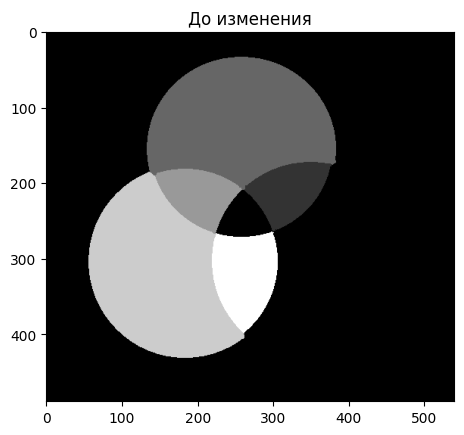

In [20]:
plt.title('До изменения')
plt.imshow(img_HSI[:,:,0], cmap='gray')
H_new=img_HSI[:,:,0].copy()
H_new.max()
plt.savefig('H.png')

In [21]:
for m in range(img_HSI.shape[0]):
    for n in range(img_HSI.shape[1]):
        if (r[m][n]==255 and g[m][n]==0 and b[m][n]==0):
            H_new[m][n]=r.max()*0.8/255
            
        elif (r[m][n]==0 and g[m][n]==255 and b[m][n]==0):
            H_new[m][n]=g.max()*0.8/255

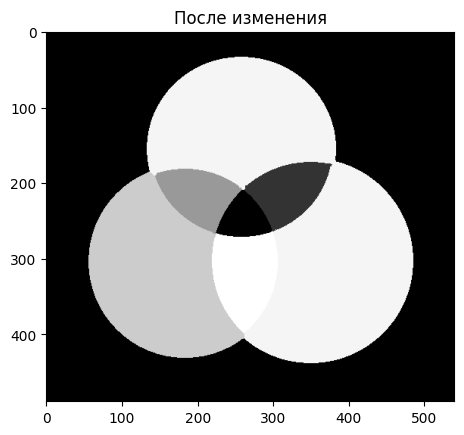

In [22]:
plt.imshow(H_new, cmap='gray')
plt.title('После изменения')
plt.savefig('H_changed.png')

*Работа с насыщенностью*

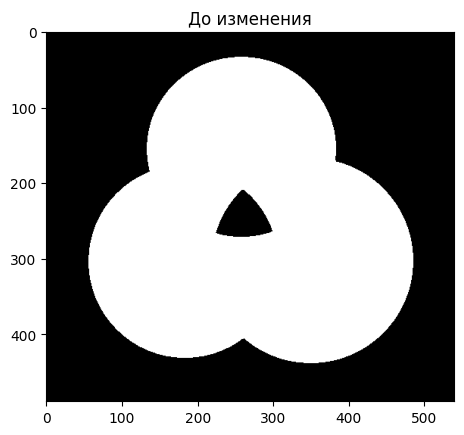

In [23]:
plt.title('До изменения')
plt.imshow(img_HSI[:,:,1], cmap='gray')
S_new=img_HSI[:,:,1].copy()
plt.savefig('P.png')

In [24]:
for m in range(img_HSI.shape[0]):
    for n in range(img_HSI.shape[1]):
        if r[m][n]!=0 and g[m][n]==0 and b[m][n]!=0:
            S_new[m][n]= S_new[m][n]/4

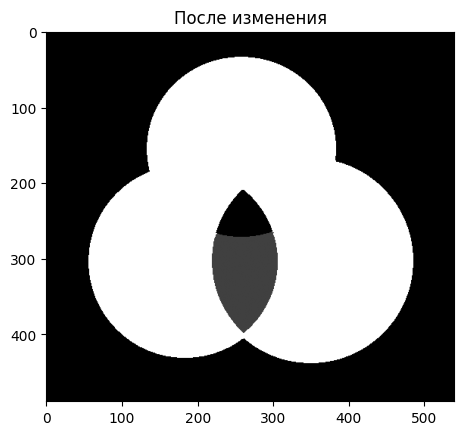

In [25]:
plt.title('После изменения')
plt.imshow(S_new, cmap='gray')
S_new.max()
plt.savefig('P_changed.png')

*Работа с интенсивностью*

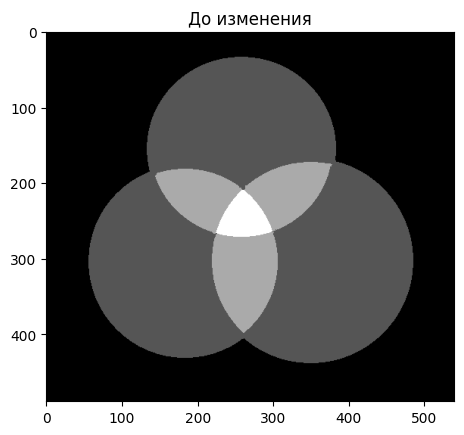

In [26]:
plt.title('До изменения')
plt.imshow(I, cmap='gray')
I_new=img_HSI[:,:,2].copy()
plt.savefig('I.png')

In [27]:
for m in range(img_HSI.shape[0]):
    for n in range(img_HSI.shape[1]):
        if r[m][n]==255 and g[m][n]==255 and b[m][n]==255:
            I_new[m][n]= I_new[m][n]/4

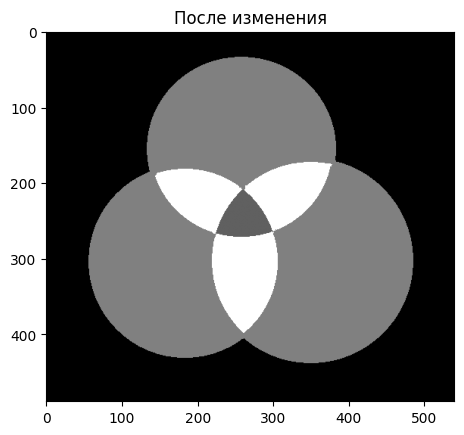

In [29]:
plt.title('После изменения')
plt.imshow(I_new, cmap='gray')
I_new.max()
plt.savefig('I_changed.png')

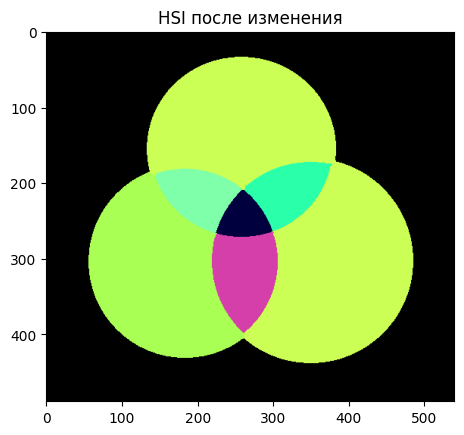

In [30]:
img_HSI_new = cv2.merge([H_new,S_new,I_new])
plt.title('HSI после изменения')
plt.imshow(img_HSI_new)
plt.savefig('HSI_new_pic.png')

In [31]:
#Преобразование HSI в RGB

def HSI2RGB(img):
    h=((np.array(img[:,:,0]).astype(np.float64))*360).astype(np.uint64)
    s=(np.array(img[:,:,1]).astype(np.float64))
    i=(np.array(img[:,:,2]).astype(np.float64))
    print(h.max(), s.max(), i.max())

    R=np.zeros((img.shape[0],img.shape[1]))
    G=np.zeros((img.shape[0],img.shape[1]))
    B=np.zeros((img.shape[0],img.shape[1]))
    
    for m in range(img.shape[0]):
        for n in range(img.shape[1]):
            if(h[m][n]>=0 and h[m][n]<120):
                B[m][n]=i[m][n]*(1-s[m][n])
                R[m][n]=i[m][n]*(1+s[m][n]*np.cos(h[m][n]*np.pi/180)/np.cos(np.pi/3 - h[m][n]*np.pi/180))
                G[m][n]=3*i[m][n]-(R[m][n]+B[m][n])
            elif(h[m][n]>=120 and h[m][n]<240):
                h_1=h[m][n]-120
                R[m][n]=i[m][n]*(1-s[m][n])
                G[m][n]=i[m][n]*(1+s[m][n]*np.cos(h_1*np.pi/180)/np.cos(np.pi/3 - h_1*np.pi/180))
                B[m][n]=3*i[m][n]-(R[m][n]+G[m][n])
            elif(h[m][n]>=240 and h[m][n]<=360):
                h_2=h[m][n]-240
                G[m][n]=i[m][n]*(1-s[m][n])
                B[m][n]=i[m][n]*(1+s[m][n]*np.cos(h_2*np.pi/180)/np.cos(np.pi/3 - h_2*np.pi/180))
                R[m][n]=3*i[m][n]-(G[m][n]+B[m][n])
    print(R.max(), G.max(), B.max())
    return (cv2.merge([R,G,B]))

300 1.0 0.6666666666666666
1.0 1.0 1.0


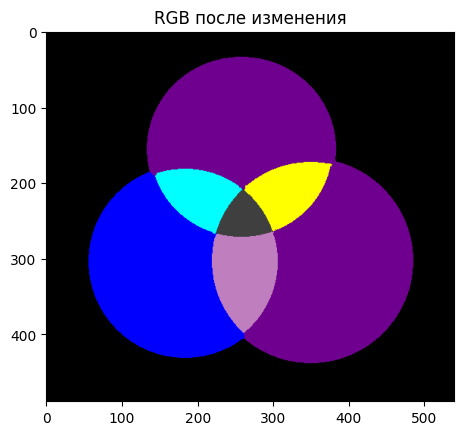

In [33]:
plt.imshow(HSI2RGB(img_HSI_new))
plt.title('RGB после изменения')
plt.savefig('RGB_new_pic.png')